# IST 691 Deep Learning in Practice

**Homework 2**

Name: Ximeng Deng

SUID: 412575955

*Save this notebook into your Google Drive. The notebook has appropriate comments at the top of code cells to indicate whether you need to modify them or not. Answer your questions directly in the notebook. Remember to use the GPU as your runtime. Once finished, run ensure all code blocks are run, download the notebook and submit through Blackboard.*

### Q1

Explain the differences between convolutional neural networks and a multi-layer perceptron. Explain whether the following statement is true, and if true, when it could be true.

'An MLP can represent the same functions as a CNN.'

*answer here*

**MLP:** A class of feedforward artificial neural network. If a layer is made up of only dense dayers, it's called a fully connected network, or a MLP (Glassner, 2021). The MLP consists of three or more layers (an input and an output layer with one or more hidden layers) of nonlinearly-activating nodes. Since MLPs are fully connected, each node in one layer connects with a certain weight $w_{ij}$ to every node in the following layer (Wikipedia, 2023), which can result in a large number of parameters.

**CNN:** A network in which the convolution layers play a central role (Glassner, 2021). CNNs are primarily designed for grid-like data, such as images or time-series data. They maintain the 2D structure as input and, therefore, work better with spatial relationships. This is based on the idea that pixels located near each other in space have a more meaningful relationship than those positioned further apart.

CNNs use the same set of weights (kernel) for different parts of the input, and each neuron in a convolutional layer is connected only to a small local region (kernel size) in the previous layer. Due to local connectivity and weight sharing, CNNs can focus on local features and detect the same feature regardless of its location in the input, making CNNs translation invariant. Besides, CNNs significantly reduce the number of parameters, making them more efficient for training high dimensionality inputs.

**Statement:** The statement is theoretically true.
The Universal Approximation Theorem (Hornik et al., 1989; Cybenko, 1989) states that a feedforward neural network with a linear output layer and at least one hidden layer with any squashing activation function (such as the logistic sigmoid activation function) can approximate any Borel measurable function from one finite dimensional space to another to any desired degree of accuracy, provided sufficiently many hidden units are available.

The Universal Approximation Theorem implies that a sufficiently large MLP has the capability to represent any function we aim to learn. However, we cannot guarantee that the training algorithm will be able to learn this function. Even if the MLP can represent the function, the training might not be effective due to two main reasons:

- The optimization algorithm used for training may fail to find the parameter values for the target function.
- Overfitting might lead the training algorithm to select an incorrect function.

The network layers can be impractically large and could fail to learn or generalize effectively.


&nbsp;

**Source:**

- Wikipedia. "Multilayer perceptron." *Wikipedia*. August 19, 2023. https://en.wikipedia.org/wiki/Multilayer_perceptron. Accessed on October 18, 2023.

- Glassner, Andrew. "Deep Learning – A Visual Approach." *No Starch Press.* 2021.

- Hornik, Kurt, Stinchcombe, Maxwell and White, Halber (1989). "Multilayer feedforward networks are universal approximators." *Neural Networks* 2(5). pp. 359–366. https://doi.org/10.1016/0893-6080(89)90020-8.

- Cybenko, George (1989). "Approximation by superpositions of a sigmoidal function." *Mathematics of Control, Signals, and Systems* 2(4). pp. 303–314. https://doi.org/10.1007/BF02551274.


### Q2

In class, we saw an example of autoencoders being able to remove the noise of an image. Explain why this happens and what the limits of such funcionality are.

*answer here*

**Denoising Autoencoders**

Given an image, an autoencoder first encodes the image into a lower-dimensional representation, subsequently decodes the representation to reconstruct the original image from this compressed form. This method employs a neural network with a narrow bottleneck layer in the middle to reconstruct high-dimensional data. This architecture enables us to use the second half of the autoencoder as a standalone generator. We can feed the generator random inputs and get back new data that looks like the training data but is, in fact, a wholly new piece of data (Glassner, 2021).

DAE is an autoencoder that takes a corrupted or noisy version of data and aims to output the original, uncorrupted version. This functionality arises from training the autoencoder end-to-end, which allows the encoder to find useful features within the data. The bottleneck forces the network to capture only the essential structure of the data, ignoring the noise since noise doesn't represent consistent or meaningful patterns. The autoencoder (decoder) can then recognize and get rid of the noise, retaining only the most elemental features. Consequently, when using the model for predictions, if we feed a noisy image into the autoencoder, it returns a reconstructed, clean version of the data.

&nbsp;

**Limits**

- Data-specific compression: Not only do autoencoders need a comprehensive amount of training data, they also need relevant data. Autoencoders compress the data that is similar to what it had been trained on. An autoencoder trained on dog photos cannot compress human faces photos easily.

- Autoencoders can be trained using purely clean data or with pairs of noisy and clean data. The ability of an autoencoder to denoise images is contingent on its training. In intricate scenarios, if the autoencoder hasn't seen a particular type of noise during training, it might not be as effective in removing it from images.

- Lossy in nature: There is always going to be some difference between the input and output of the autoencoder. The output will always have some missing information in it.

&nbsp;

**Source:**

- Gupta, Manthan. "Denoising Images Using Autoencoders." *Medium*. November 10, 2020.
https://medium.com/theleanprogrammer/denoising-images-using-autoencoders-4a64499f10ba

- "Autoencoders and the Denoising Feature: From Theory to Practice. Lucas Robinet." November 26, 2020. https://towardsdatascience.com/autoencoders-and-the-denoising-feature-from-theory-to-practice-db7f7ad8fc78

- Slides DLP-06-Autoencoding-and-Transfer-Learning.pdf



### Q3

When using transfer learning models, sometimes we get better results by fine-tuning, and some other times we get better results by freezing the parameters before training. Under what circumstances should we fine-tune the model in order to get a better result? And, under what circumstances should we freeze the parameters instead?

**Amout of data:** If we have a large dataset and our target task labels are more plentiful, we can fine-tune more layers since we're less likely to overfit by fine-tuning the model. However, if our target task labels are scarce and we want to avoid overfitting, we might freeze more layers.

**Cumputing resources and time:** If we have the necessary hardware and the time, fine-tuning could be beneficial. If we’re limited in computational resources and time, it might be practical to freeze the majority of the model and train only a few top layers, backpropagating through just these layers.

**Similarity or Difference of the task:** The more we unfreeze, the more we change the behavior of the output. Thus, if our new task is significantly different from the task the model was originally trained on, we might benefit from fine-tuning. If the new task is very similar to the task the model was trained on, the model might already have learned features that are relevant.

&nbsp;

**Source:**

Slides DLP-06-Autoencoding-and-Transfer-Learning.pdf


### Q4: MLP vs CNN

Below, there are two neural networks for classifying MNIST digits: `model_mlp`  is an MLP with no hidden layers (the smallest possible) and 7,850 parameters. Evaluate the performance of this model below.

Then, define a convolutional neural network with similar a number of parameters and evaluate its performance. Can it do better? Why?

In [1]:
# DO NOT MODIFY THIS CELL

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_mlp = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_mlp.summary()

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_mlp.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_mlp.fit(x_train,
              y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_split = 0.1,
              verbose = 1)

Epoch 1/15
422/422 [==============================] - 6s 5ms/step - loss: 0.7075 - accuracy: 0.8236 - val_loss: 0.3518 - val_accuracy: 0.9118
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3784 - accuracy: 0.8980 - val_loss: 0.2858 - val_accuracy: 0.9248
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.9085 - val_loss: 0.2625 - val_accuracy: 0.9295
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.9141 - val_loss: 0.2513 - val_accuracy: 0.9320
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.9167 - val_loss: 0.2430 - val_accuracy: 0.9335
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.9193 - val_loss: 0.2374 - val_accuracy: 0.9347
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.9206 - val_loss: 0.2348 - val_accuracy: 0.9358
Epoch 

In [3]:
# DO NOT MODIFY CELL
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2655332386493683
Test accuracy: 0.9264000058174133


In [4]:
# DEFINE YOUR OWN CNN SO THAT THE PARAMETERS ARE FEWER THAN THE MLP
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size = (3, 3), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Conv2D(16, kernel_size = (3, 3), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)              

In [5]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_cnn.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 9s 6ms/step - loss: 0.6610 - accuracy: 0.7888 - val_loss: 0.1300 - val_accuracy: 0.9660
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2246 - accuracy: 0.9315 - val_loss: 0.0886 - val_accuracy: 0.9758
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1735 - accuracy: 0.9477 - val_loss: 0.0759 - val_accuracy: 0.9803
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1498 - accuracy: 0.9540 - val_loss: 0.0661 - val_accuracy: 0.9837
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1361 - accuracy: 0.9584 - val_loss: 0.0600 - val_accuracy: 0.9837
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1292 - accuracy: 0.9602 - val_loss: 0.0558 - val_accuracy: 0.9855
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1204 - accuracy: 0.9624 - val_loss: 0.0522 - val_accuracy: 0.9863
Epoch 

In [6]:
# DO NOT MODIFY CELL
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04215378314256668
Test accuracy: 0.9866999983787537


**Did the CNN do better than the MLP? Why or why not?**

Yes, CNN performs better than the MLP despite having fewer parameters.

MLP classifer with 7,850 parameters (15 epochs and batch size of 128) is having a test loss of 0.2655 and a test accuracy of 92.64%.

CNN classifer with 6,490 parameters (15 epochs and batch size of 128) is having a test loss of 0.0422 and a test accuracy of 98.67%.


**Reason:**

- Spatial Relationships: CNN works better with images as it keeps the 2D structure as input, can identify hierarchical patterns in the images.

- Weight Sharing: CNN uses the same set of weights (kernel) for different parts of the input, significantly reduces the number of parameters, making them more efficient for training high dimensionality inputs.

- Translation Invariant: Due to weight sharing and pooling, CNNs are translation invariant. They're better suited to recognize patterns irrespective of their positions in the image.


### Q5: Transfer learning

We are going to classify beans using transfer learning (read more about the dataset [here](https://www.tensorflow.org/datasets/catalog/beans). In the code below, use the `ResNet50` model available in Keras to classify the beans dataset (3 classes). **Do not fine tune `ResNet50`**. What is the performance?

In [7]:
# !pip install tensorflow-datasets --upgrade

In [8]:
# DO NOT MODIFY CELL
! pip install datasets
from datasets import load_dataset
beans = load_dataset('beans')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.9 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

In [9]:
# DO NOT MODIFY CELL
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

train_images_np = np.array([np.array(img) for img in beans['train']['image']])
test_images_np = np.array([np.array(img) for img in beans['test']['image']])

train_ds = tf.convert_to_tensor(train_images_np)
test_ds = tf.convert_to_tensor(test_images_np)

# resizing images
train_ds = tf.image.resize(train_ds, (200, 200))
test_ds = tf.image.resize(test_ds, (200, 200))

train_labels = beans['train']['labels']
test_labels = beans['test']['labels']

# transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes = 3)
test_labels = to_categorical(test_labels, num_classes = 3)

In [10]:
# IMPORT THE APPROPRIATE MODEL HERE
from tensorflow.keras.applications.resnet50  import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

## loading ResNet50 model
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (200,200,3))
base_model.trainable = False

## preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(3, activation = 'softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    layers.Dropout(0.2),
    prediction_layer
])

94765736/94765736 [==============================] - 1s 0us/step


In [11]:
# DO NOT MODIFY CELL
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [12]:
# DO NOT MODIFY CELL
model.fit(train_ds, train_labels, epochs = 5, validation_split = 0.2, batch_size = 64)

Epoch 1/5
13/13 [==============================] - 22s 648ms/step - loss: 3.6783 - accuracy: 0.6747 - val_loss: 2.8603 - val_accuracy: 0.8406
Epoch 2/5
13/13 [==============================] - 3s 227ms/step - loss: 0.9782 - accuracy: 0.9093 - val_loss: 6.1788 - val_accuracy: 0.7053
Epoch 3/5
13/13 [==============================] - 3s 228ms/step - loss: 0.3653 - accuracy: 0.9504 - val_loss: 1.8105 - val_accuracy: 0.8986
Epoch 4/5
13/13 [==============================] - 3s 232ms/step - loss: 0.0523 - accuracy: 0.9879 - val_loss: 1.9380 - val_accuracy: 0.8889
Epoch 5/5
13/13 [==============================] - 3s 230ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 1.9269 - val_accuracy: 0.8841


In [13]:
# DO NOT MODIFY CELL
score = model.evaluate(test_ds, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.574953317642212
Test accuracy: 0.859375


The model has an accuracy of 85.94% on the test dataset and the test loss is 1.5750. I think this performance is relatively good, considering that the model wasn't fine-tuned on the beans dataset.

### Q6: Autoencoder

Modify the convolutional autoencoder for MNIST we saw in class so that the embedding has the following structure:
- Conv2D: 8 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 3 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 1 filters, Kernel (3, 3)

After making this change, you need to change the input size of the decoder function so that it can accept the output of the encoder. What is the performance of your model?

In [2]:
#!pip install keras==2.2.5
!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [3]:
# DO NOT MODIFY THIS CELL
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import h5py

# data now has a different shape
random_seed = 42
np.random.seed(random_seed)

# load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# cast the sample data to the current Keras floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# reshape to 2D grid, one line per image
X_train = X_train.reshape(X_train.shape[0], number_of_pixels)
X_test = X_test.reshape(X_test.shape[0], number_of_pixels)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# reshape sample data to 4D tensor using channels_last convention
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [4]:
# MODIFY THE ENCODER BELOW ACCORDING TO THE QUESTION REQUIREMENTS
CAE_encoder_input = Input(shape=(28, 28, 1))

CAE_encoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_1 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_conv_2 = Conv2D(3, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_2 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_output = Conv2D(1, (3, 3), activation = 'relu', padding = 'same')



In [5]:
# DO NOT MODIFY THIS CELL
CAE_decoder_up_1 = UpSampling2D((2,2))
CAE_decoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_decoder_up_2 = UpSampling2D((2,2))
CAE_decoder_output = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')



CAE_encoder_step_1 = CAE_encoder_conv_1(CAE_encoder_input)
CAE_encoder_step_2 = CAE_encoder_pool_1(CAE_encoder_step_1)
CAE_encoder_step_3 = CAE_encoder_conv_2(CAE_encoder_step_2)
CAE_encoder_step_4 = CAE_encoder_pool_2(CAE_encoder_step_3)
CAE_encoder_step_5 = CAE_encoder_output(CAE_encoder_step_4)

CAE_decoder_step_1 = CAE_decoder_up_1(CAE_encoder_step_5)
CAE_decoder_step_2 = CAE_decoder_conv_1(CAE_decoder_step_1)
CAE_decoder_step_3 = CAE_decoder_up_2(CAE_decoder_step_2)
CAE_decoder_step_4 = CAE_decoder_output(CAE_decoder_step_3)


Conv_AE = Model(CAE_encoder_input, CAE_decoder_step_4)
Conv_AE.compile(optimizer = 'adam', loss = 'binary_crossentropy')


Conv_AE_encoder_only_model = Model(CAE_encoder_input, CAE_encoder_step_5)

In [6]:
# MODIFY THE INPUT FOR THE DECODER BELOW ACCORDING TO THE OUTPUT EXPECTED FROM THE ENCODER
Conv_AE_encoder_only_model.summary()
Conv_AE_decoder_only_input = Input(shape=(7, 7, 1))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 3)         219       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 3)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 1)           28  

In [7]:
# DO NOT MODIFY THIS CELL
Conv_AE_decoder_only_step_1 = CAE_decoder_up_1(Conv_AE_decoder_only_input)
Conv_AE_decoder_only_step_2 = CAE_decoder_conv_1(Conv_AE_decoder_only_step_1)
Conv_AE_decoder_only_step_3 = CAE_decoder_up_2(Conv_AE_decoder_only_step_2)
Conv_AE_decoder_only_step_4 = CAE_decoder_output(Conv_AE_decoder_only_step_3)

Conv_AE_decoder_only_model = Model(Conv_AE_decoder_only_input, Conv_AE_decoder_only_step_4)

In [8]:
# DO NOT MODIFY THIS CELL
# FIT AND EVALUATE PERFORMANCE
Conv_AE.fit(X_train, X_train,
               epochs = 50, batch_size = 128, shuffle = True,
               verbose = 2,
               validation_data = (X_test, X_test))

Epoch 1/50
469/469 - 11s - loss: 0.2700 - val_loss: 0.1661 - 11s/epoch - 23ms/step
Epoch 2/50
469/469 - 2s - loss: 0.1560 - val_loss: 0.1483 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.1455 - val_loss: 0.1416 - 2s/epoch - 5ms/step
Epoch 4/50
469/469 - 2s - loss: 0.1407 - val_loss: 0.1378 - 2s/epoch - 5ms/step
Epoch 5/50
469/469 - 2s - loss: 0.1367 - val_loss: 0.1335 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 3s - loss: 0.1326 - val_loss: 0.1301 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 2s - loss: 0.1286 - val_loss: 0.1255 - 2s/epoch - 5ms/step
Epoch 8/50
469/469 - 2s - loss: 0.1243 - val_loss: 0.1212 - 2s/epoch - 5ms/step
Epoch 9/50
469/469 - 2s - loss: 0.1207 - val_loss: 0.1182 - 2s/epoch - 5ms/step
Epoch 10/50
469/469 - 2s - loss: 0.1181 - val_loss: 0.1160 - 2s/epoch - 5ms/step
Epoch 11/50
469/469 - 2s - loss: 0.1162 - val_loss: 0.1143 - 2s/epoch - 5ms/step
Epoch 12/50
469/469 - 3s - loss: 0.1147 - val_loss: 0.1129 - 3s/epoch - 6ms/step
Epoch 13/50
469/469 - 2s - loss: 0

In [9]:
# DO NOT MODIFY THIS CELL
def draw_predictions_set(predictions, filename = None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin = 0, vmax = 1, cmap = 'gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i + 6)
        plt.imshow(predictions[i].reshape(28, 28), vmin = 0, vmax = 1, cmap = 'gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

313/313 [==============================] - 1s 2ms/step


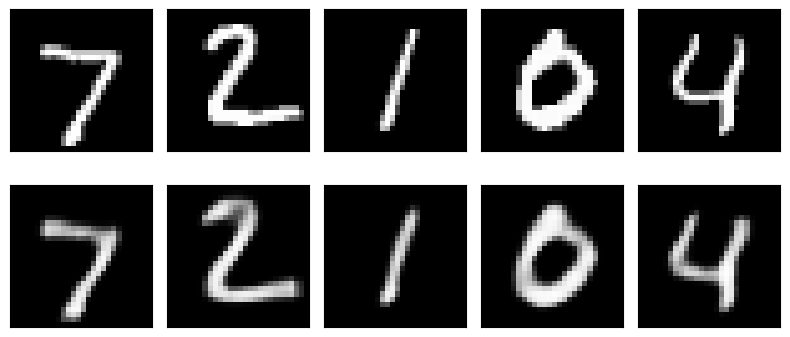

In [10]:
# Test your new predictions
Conv_predictions = Conv_AE.predict(X_test)
draw_predictions_set(Conv_predictions, 'NB3-ConvAE-predictions')

The validation loss is 0.1051, and the output images are recognizable digits. The capability of this model to reconstruct the input is quite good. Besides, at epoch 50, the validation loss continues to decrease, suggesting that the model is not overfitting and further training might lead to even better results.

According to Glassner, the autoencoder needs to have both enough computational power (that is, enough neurons and weights) to figure out how to encode the data, and enough latent variables to find a useful compressed representation of the input. This model has 7x7x1=49 latent variables, while the model we saw in class had 7x7x3=147 latent variables. Therefore, this new model is a more compressed representation, but it still captures the necessary features to reconstruct the input. In short, this model is pretty effective and efficient.